In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
# Load the datasets
train_df = pd.read_csv('C:/Users/jobkg/OneDrive/Desktop/Prodigy Task 2/Datasets/train.csv')
test_df = pd.read_csv('C:/Users/jobkg/OneDrive/Desktop/Prodigy Task 2/Datasets/test.csv')
gender_submission_df = pd.read_csv('C:/Users/jobkg/OneDrive/Desktop/Prodigy Task 2/Datasets/gender_submission.csv')

In [3]:
# Display the first few rows of the training dataset
print("Training Dataset:")
train_df.head()


Training Dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display basic statistics
print("\nTraining Dataset Statistics:")
print(train_df.describe())


Training Dataset Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# Check for missing values
print("\nMissing Values in Training Dataset:")
print(train_df.isnull().sum())



Missing Values in Training Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:



age_imputer = SimpleImputer(strategy='median')
train_df['Age'] = age_imputer.fit_transform(train_df[['Age']])


train_df =train_df.drop('Cabin', axis=1)


embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(embarked_mode, inplace=True)


print(train_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\jobkg\AppData\Local\Temp\ipykernel_19368\2748199868.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(embarked_mode, inplace=True)


In [7]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:



age_imputer = SimpleImputer(strategy='median')
test_df['Age'] = age_imputer.fit_transform(test_df[['Age']])


test_df =test_df.drop('Cabin', axis=1)


fare_imputer = SimpleImputer(strategy='median')
test_df['Fare'] = fare_imputer.fit_transform(test_df[['Fare']])


embarked_mode = test_df['Embarked'].mode()[0]
test_df['Embarked'].fillna(embarked_mode, inplace=True)

# Check the cleaned data
print(test_df.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\jobkg\AppData\Local\Temp\ipykernel_19368\3453378281.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Embarked'].fillna(embarked_mode, inplace=True)


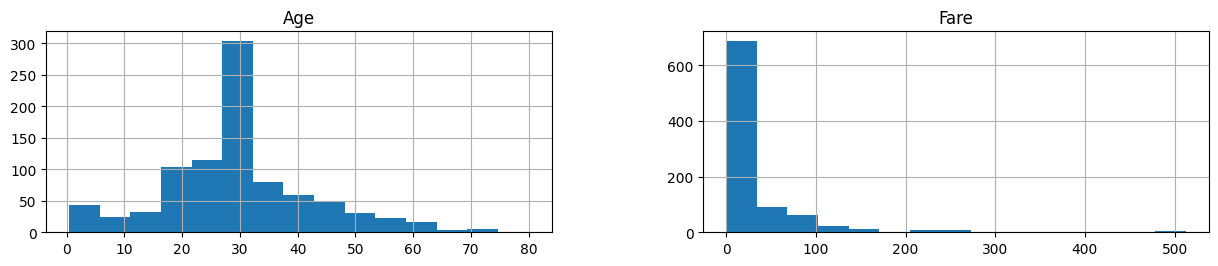

In [9]:
# Visualize the distribution of numerical features
numerical_features = ['Age', 'Fare']
train_df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.show()


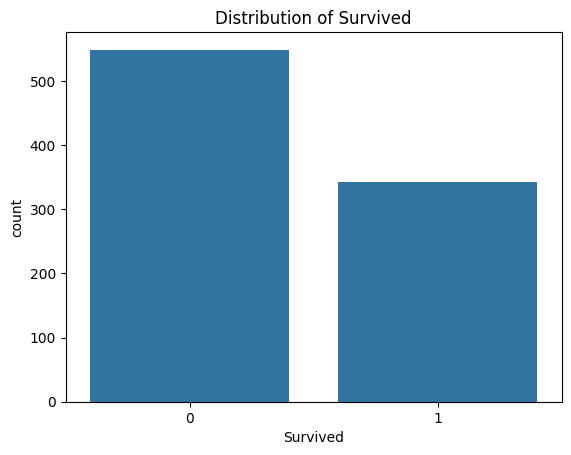

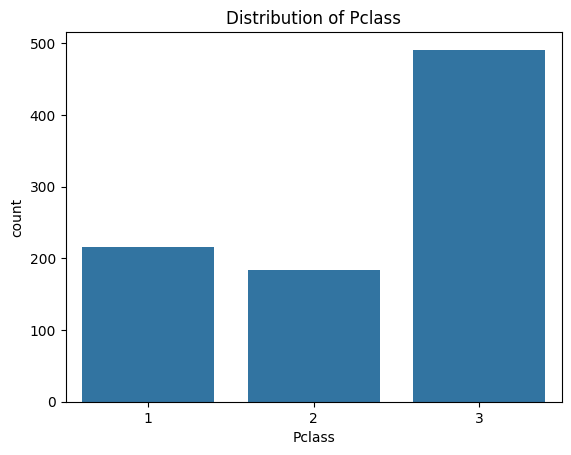

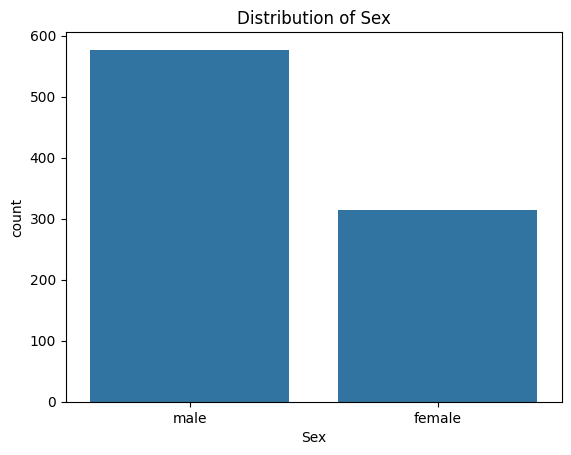

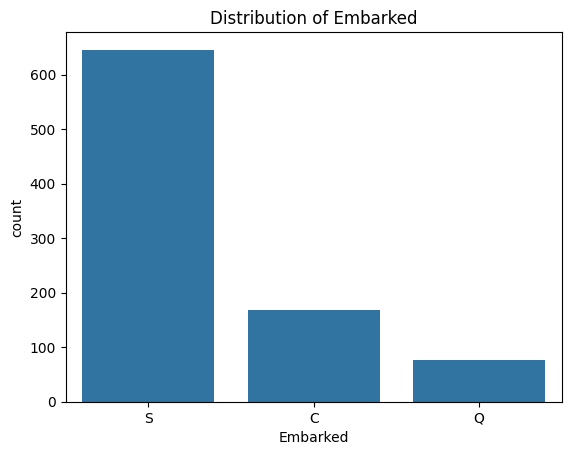

In [10]:
# Visualize the count of categorical features
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    sns.countplot(x=feature, data=train_df)
    plt.title(f'Distribution of {feature}')
    plt.show()

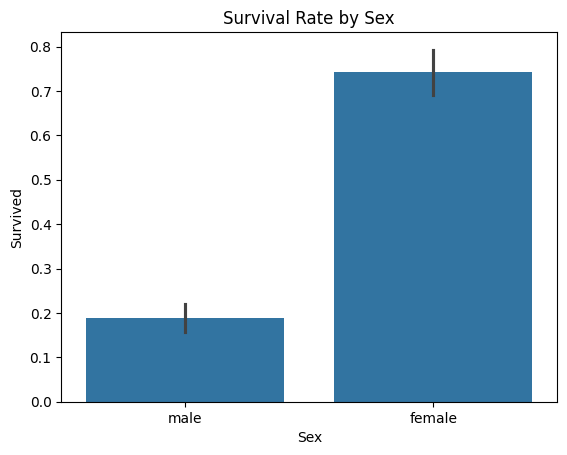

In [11]:
# Analyze survival rate based on different features
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()


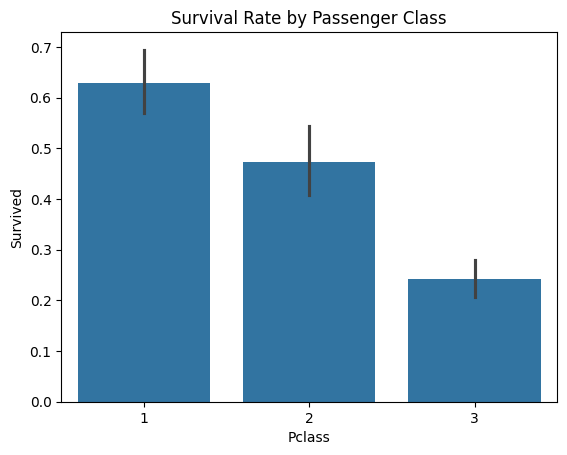

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

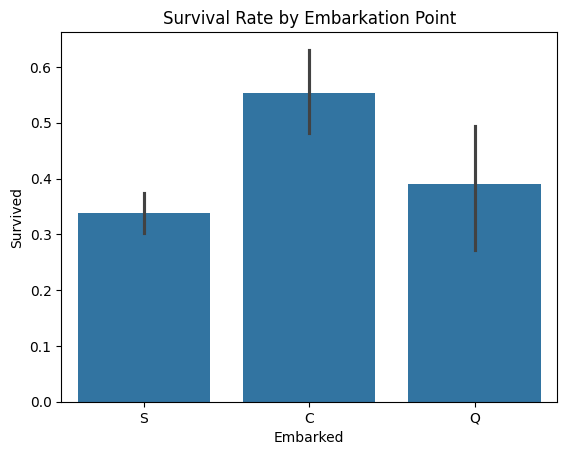

In [13]:
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarkation Point')
plt.show()


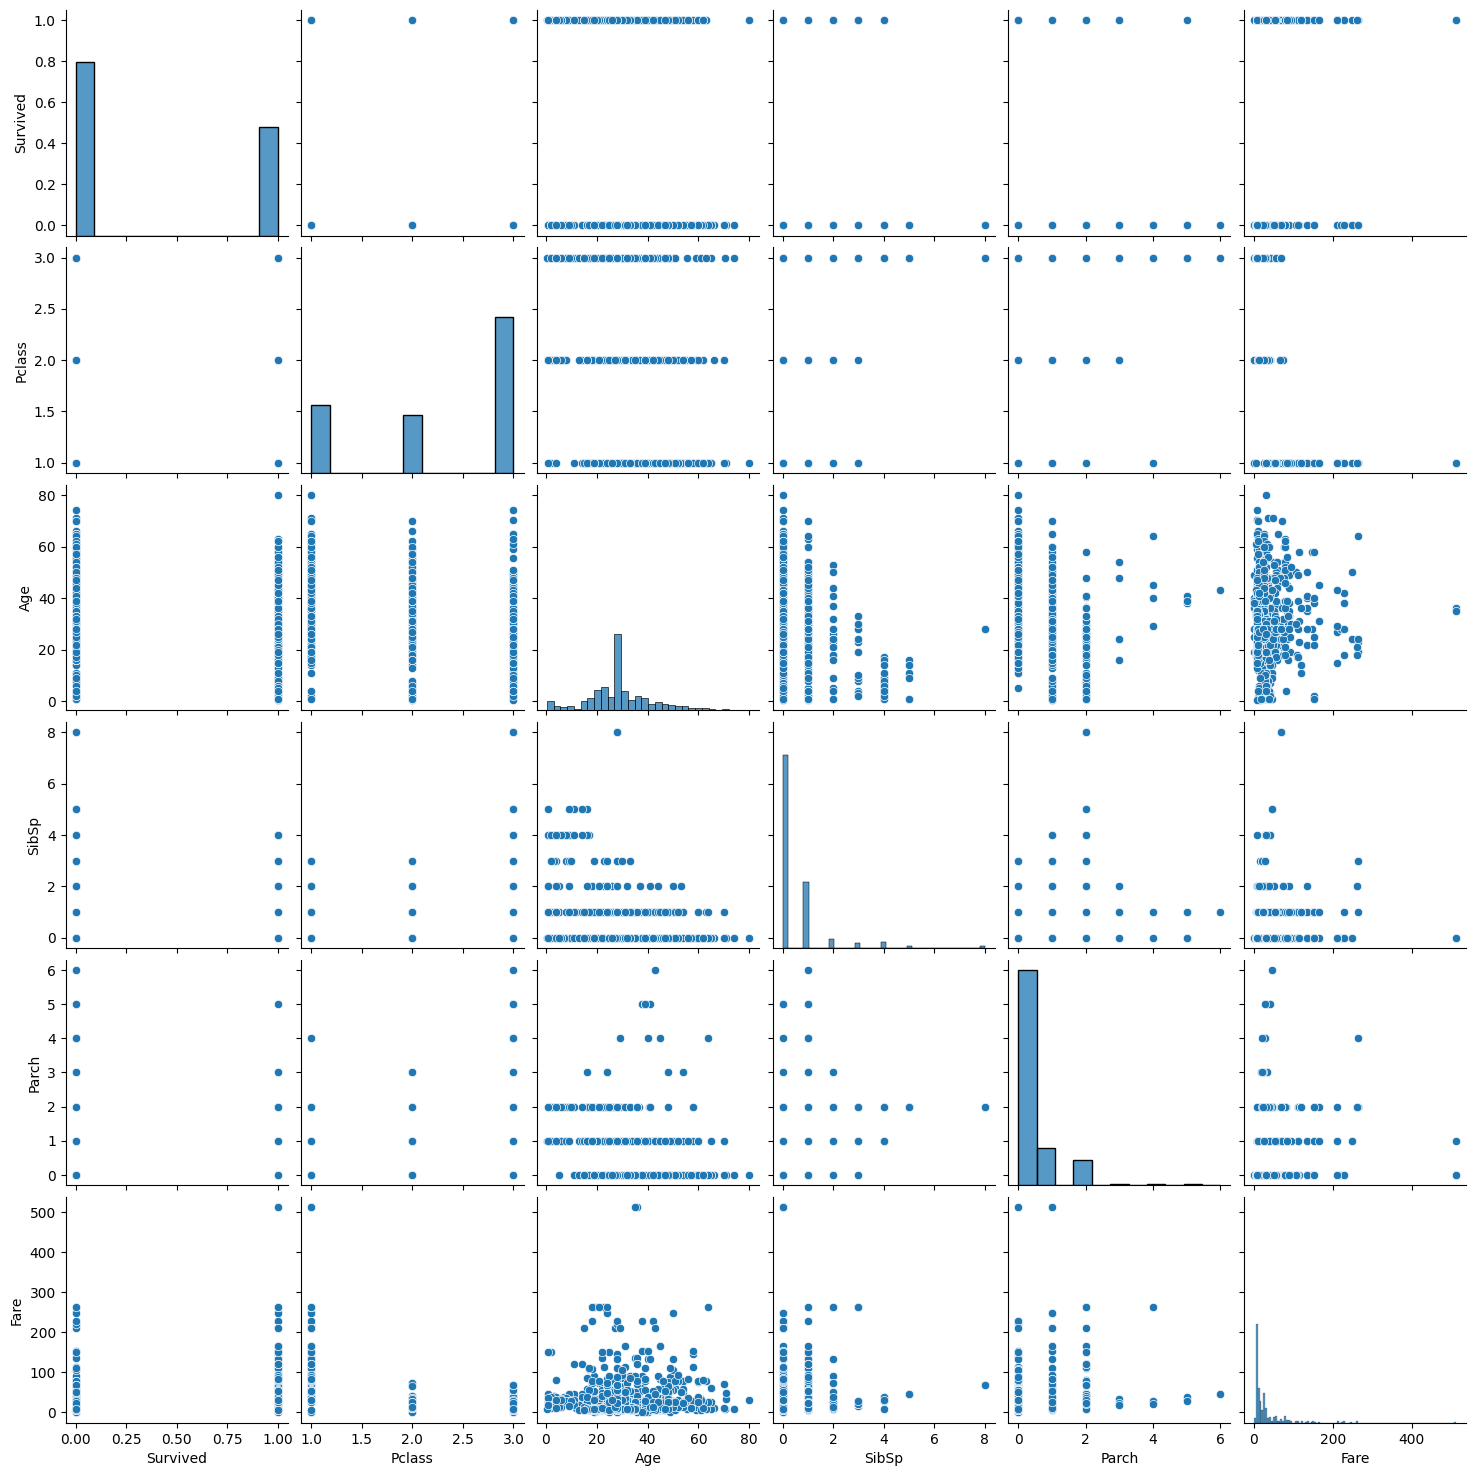

In [14]:

# Pairplot to see the relationship between features
sns.pairplot(train_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.show()

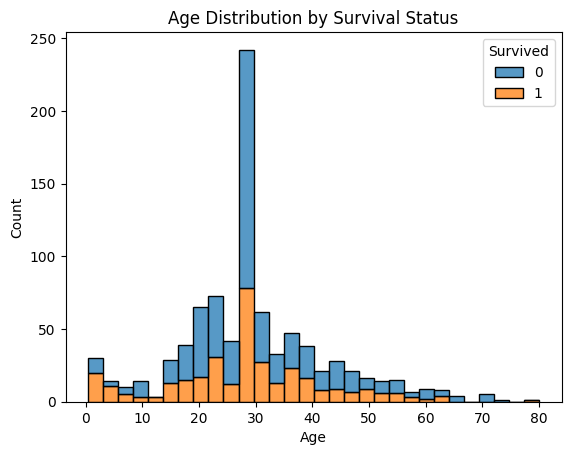

In [15]:
# Age distribution by survival status
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival Status')
plt.show()

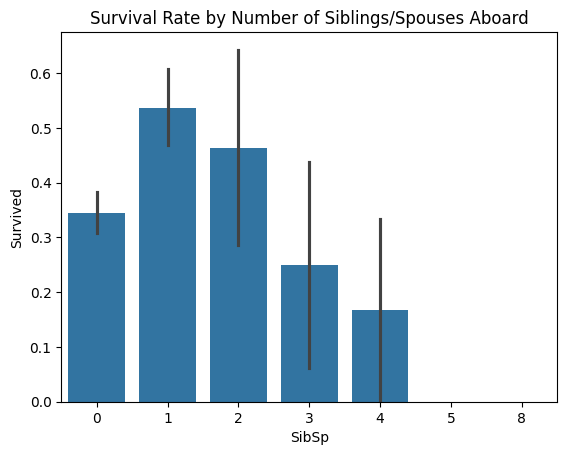

In [16]:
# Survival rate by number of siblings/spouses aboard
sns.barplot(x='SibSp', y='Survived', data=train_df)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.show()

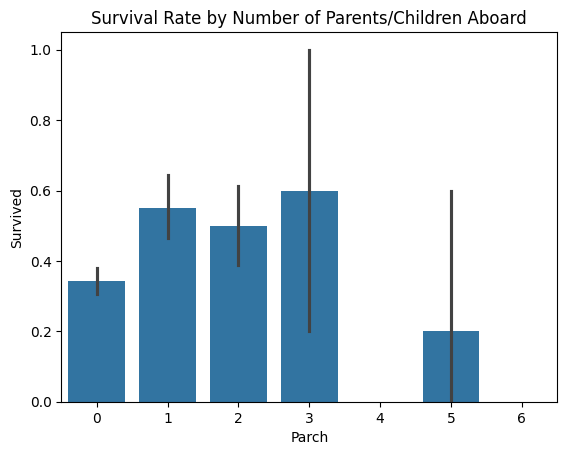

In [17]:
sns.barplot(x='Parch', y='Survived', data=train_df)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

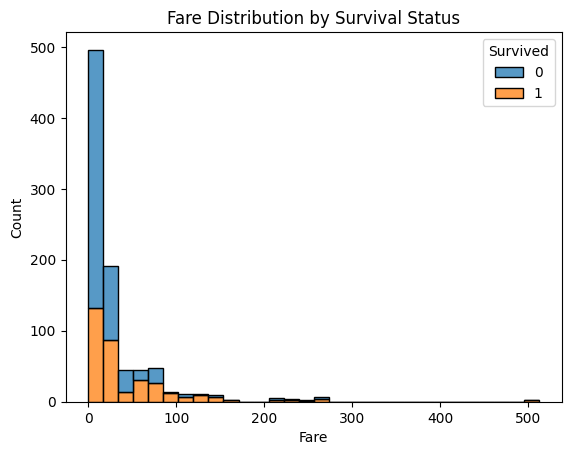

In [18]:
# Fare distribution by survival status
sns.histplot(data=train_df, x='Fare', hue='Survived', multiple='stack', bins=30)
plt.title('Fare Distribution by Survival Status')
plt.show()